In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
from nltk.tokenize import TreebankWordTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [16]:
df_train=pd.read_csv('C:\\Users\\ashup\\Downloads\\Conqurer\\data\\train.csv', encoding='utf8')

df_test=pd.read_csv('C:\\Users\\ashup\\Downloads\\Conqurer\\data\\test.csv', encoding='utf8')

check dimensions of the train and test dataset.

In [17]:
df_train.shape, df_test.shape

((7274, 3), (1819, 2))

NUll value remove

In [18]:
df_train.isnull().sum() ,df_test.isnull().sum()

(tweet_id     0
 tweet        1
 sentiment    0
 dtype: int64, tweet_id    0
 tweet       0
 dtype: int64)

In [19]:
df_train.dropna(inplace=True)

In [20]:
df_train["sentiment"].value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

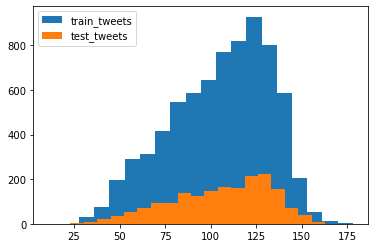

In [21]:
length_train = df_train['tweet'].str.len()
length_test = df_test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [22]:
combi = df_train.append(df_test, ignore_index=True)
combi.shape

C:\Users\ashup\Miniconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(9092, 3)

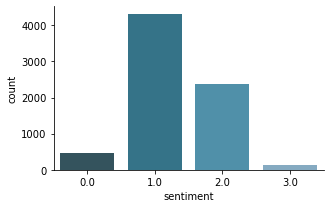

In [24]:
sns.factorplot(x="sentiment", data=combi, kind="count", size=3, aspect=1.5, palette="PuBuGn_d")
plt.show();

Given below is a function to remove unwanted text patterns from the tweets

In [25]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

1 Removing Twitter Handles (@__)

In [26]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller,1701,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller
1,1.0,"Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw",1851,"Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw"
2,2.0,"one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot; {link}",2689,"one of the most in-your-face ex. of stealing the show in yrs RT &quot;At #SXSW, Apple schools the mkt experts&quot; {link}"
3,0.0,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork,4525,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork
4,1.0,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link},3604,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link}


2. Removing Punctuations, Numbers, and Special Characters

In [27]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller,1701,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller
1,1.0,"Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw",1851,Learning ab Google doodles All doodles should be light funny amp innovative with exceptions for significant occasions #GoogleDoodle #sxsw
2,2.0,"one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot; {link}",2689,one of the most in your face ex of stealing the show in yrs RT quot At #SXSW Apple schools the mkt experts quot link
3,0.0,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork,4525,This iPhone #SXSW app would b pretty awesome if it didn t crash every mins during extended browsing #Fuckit #Illmakeitwork
4,1.0,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link},3604,Line outside the Apple store in Austin waiting for the new iPad #SXSW link
5,1.0,#technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech,966,#technews One lone dude awaits iPad at Apple s SXSW store link #Tech News #Apple #iPad #SXSW #tablets #tech
6,1.0,"SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link} #sxsw #ipad",1395,SXSW Tips Prince NPR Videos Toy Shopping With Zuckerberg link #sxsw #ipad
7,1.0,NU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable,8182,NU user RT New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable
8,2.0,Free #SXSW sampler on iTunes {link} #FreeMusic,8835,Free #SXSW sampler on iTunes link #FreeMusic
9,2.0,I think I might go all weekend without seeing the same iPad case twice... #sxsw,883,I think I might go all weekend without seeing the same iPad case twice #sxsw


3. Removing Short Words

In [28]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Let’s take another look at the first few rows of the combined dataframe.

In [30]:
combi.head()

,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller,1701,#sxswnui #sxsw #apple defining language touch with different dialects becoming smaller
1,1.0,"Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw",1851,Learning Google doodles doodles should light funny innovative with exceptions significant occasions #GoogleDoodle #sxsw
2,2.0,"one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot; {link}",2689,most your face stealing show quot #SXSW Apple schools experts quot link
3,0.0,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork,4525,This iPhone #SXSW would pretty awesome didn crash every mins during extended browsing #Fuckit #Illmakeitwork
4,1.0,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link},3604,Line outside Apple store Austin waiting iPad #SXSW link


4. Text Normalization

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [31]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [32]:
tokenized_tweet.head()

0                                        [#sxswnui, #sxsw, #apple, defining, language, touch, with, different, dialects, becoming, smaller]
1    [Learning, Google, doodles, doodles, should, light, funny, innovative, with, exceptions, significant, occasions, #GoogleDoodle, #sxsw]
2                                                      [most, your, face, stealing, show, quot, #SXSW, Apple, schools, experts, quot, link]
3              [This, iPhone, #SXSW, would, pretty, awesome, didn, crash, every, mins, during, extended, browsing, #Fuckit, #Illmakeitwork]
4                                                                         [Line, outside, Apple, store, Austin, waiting, iPad, #SXSW, link]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [34]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Now let’s stitch these tokens back together.

In [35]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

Story Generation and Visualization from Tweets

__A) Understanding the common words used in the tweets: WordCloud__

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

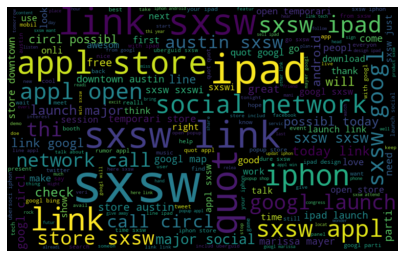

In [46]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

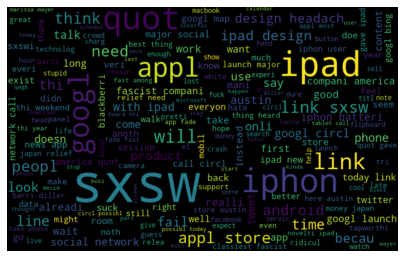

In [45]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

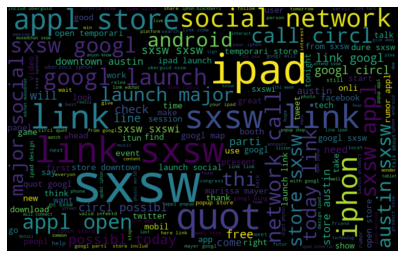

In [42]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

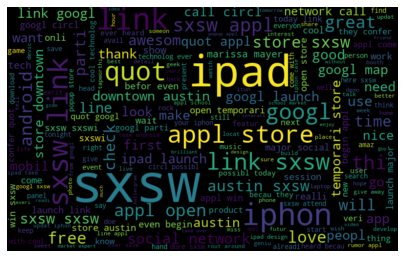

In [44]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

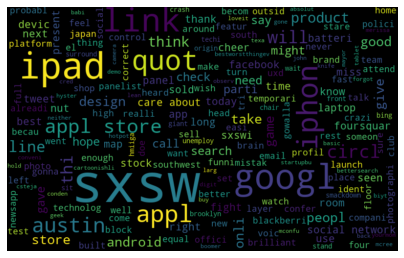

In [47]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

Now that we have prepared our lists of hashtags for 4of the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags 0,1,2,3

In [50]:

HT_negative = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 0])

HT_neutral = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 1])

HT_positive = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 2])

HT_cant_tell = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 3])

# unnesting list
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])
HT_positive = sum(HT_positive,[])
HT_cant_tell = sum(HT_cant_tell,[])

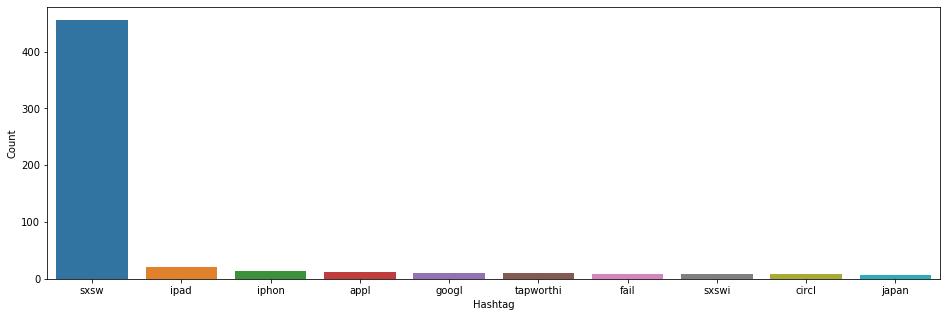

In [57]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

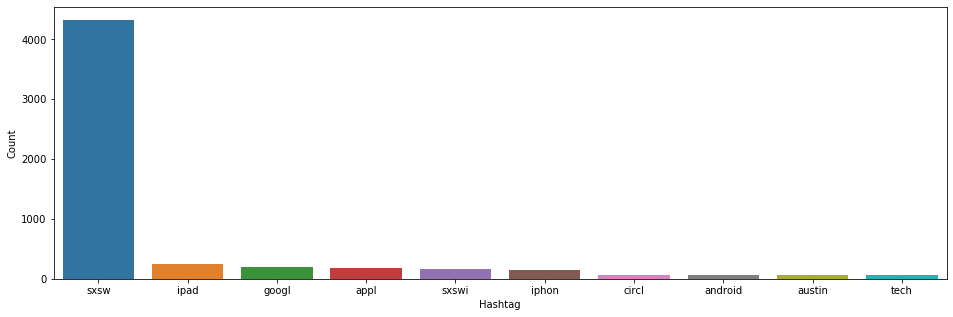

In [56]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

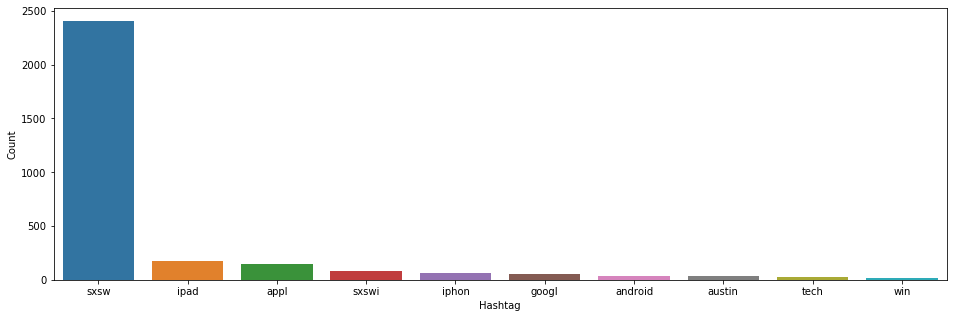

In [55]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Extracting Features from Cleaned Tweets

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

Bag-of-Words Features

In [95]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(9092, 1000)

TF-IDF Features

In [61]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(9092, 1000)

Word Embeddings

In [62]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(1372738, 1948800)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [63]:
model_w2v.wv.most_similar(positive="sxsw")

[('#event', 0.4625108242034912),
 ('#bjdproduct', 0.45700162649154663),
 ('##appl', 0.44900476932525635),
 ('pump', 0.4470270872116089),
 ('#prsa', 0.444085031747818),
 ('glimp', 0.4434088468551636),
 ('#offer', 0.44010990858078003),
 ('#sxswprsa', 0.434142142534256),
 ('#crazyco', 0.43378013372421265),
 ('clever', 0.43085041642189026)]

In [65]:
model_w2v.wv.most_similar(positive="appl")

[('shut', 0.6239428520202637),
 ('weep', 0.6220844388008118),
 ('toptweet', 0.6136957406997681),
 ('seeker', 0.6071044206619263),
 ('sketchi', 0.6057338714599609),
 ('ooooo', 0.6052823066711426),
 ('omarg', 0.6034578680992126),
 ('bastard', 0.600895345211029),
 ('#sxswprsa', 0.5985804796218872),
 ('hehe', 0.594775915145874)]

In [66]:
model_w2v['googl']

array([ 3.44356112e-02, -2.12726798e-02, -2.71611869e-01, -3.32161367e-01,
        3.64474744e-01,  1.29159361e-01,  1.23318009e-01,  1.22608691e-01,
        2.73844600e-01,  2.37292960e-01,  2.25189433e-01,  1.10168815e-01,
       -3.17517936e-01,  2.66380966e-01,  6.56557307e-02, -2.40012944e-01,
        3.95821184e-02,  1.06291501e-02,  5.16659813e-03, -9.98016372e-02,
        3.63655180e-01,  1.99256271e-01, -5.99414766e-01,  1.42350793e-01,
       -2.90132225e-01, -4.20646258e-02, -1.77426152e-02, -2.21032426e-01,
        3.64130318e-01,  2.23457024e-01,  1.56692445e-01,  1.70390993e-01,
       -3.03767115e-01, -1.30223230e-01,  5.56924164e-01,  2.37965494e-01,
       -3.98949832e-01,  1.88854691e-02,  1.08894013e-01, -7.02252728e-04,
        3.49642158e-01,  2.79466838e-01, -4.14115749e-02, -1.34158775e-01,
       -2.02639580e-01,  3.00150871e-01, -1.18405052e-01, -3.35771888e-01,
        3.61495912e-01,  3.78462315e-01,  4.48659770e-02,  7.57058412e-02,
        2.35447273e-01, -

In [67]:
len(model_w2v['googl'])

200

__Preparing Vectors for Tweets__

In [68]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [69]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(9092, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

2. Doc2Vec Embedding

In [81]:
from tqdm import tqdm
#tqdm_pandas(tqdm_notebook, *args, **kwargs)
from gensim.models.doc2vec import LabeledSentence

In [82]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [83]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [84]:
labeled_tweets[:6]

[LabeledSentence(words=['#sxswnui', '#sxsw', '#appl', 'defin', 'languag', 'touch', 'with', 'differ', 'dialect', 'becom', 'smaller'], tags=['tweet_0']),
 LabeledSentence(words=['learn', 'googl', 'doodl', 'doodl', 'should', 'light', 'funni', 'innov', 'with', 'except', 'signif', 'occa', '#googledoodl', '#sxsw'], tags=['tweet_1']),
 LabeledSentence(words=['most', 'your', 'face', 'steal', 'show', 'quot', '#sxsw', 'appl', 'school', 'expert', 'quot', 'link'], tags=['tweet_2']),
 LabeledSentence(words=['thi', 'iphon', '#sxsw', 'would', 'pretti', 'awesom', 'didn', 'crash', 'everi', 'min', 'dure', 'extend', 'brow', '#fuckit', '#illmakeitwork'], tags=['tweet_3']),
 LabeledSentence(words=['line', 'outsid', 'appl', 'store', 'austin', 'wait', 'ipad', '#sxsw', 'link'], tags=['tweet_4']),
 LabeledSentence(words=['#technew', 'lone', 'dude', 'await', 'ipad', 'appl', 'sxsw', 'store', 'link', '#tech', 'new', '#appl', '#ipad', '#sxsw', '#tablet', '#tech'], tags=['tweet_5'])]

In [85]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

C:\Users\ashup\Miniconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████████████████████████████████████████████████████████████████████| 9092/9092 [00:00<00:00, 648889.92it/s]


In [86]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [87]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(9092, 200)

#Model Building_

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

Logistic Regression
Support Vector Machine
RandomForest
XGBoost

#1. Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Bag-of-Words Features

In [103]:
train_bow = bow[:7273,:]
test_bow = bow[7273:,:]
test_bow.shape

(1819, 1000)

In [121]:
train_bow = bow[:7273,:]
test_bow = bow[7273:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df_train['sentiment'],  
                                                          random_state=45, 
                                                          test_size=0.25)

In [122]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int, average='micro') # calculating f1 score

C:\Users\ashup\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5618471687740517

In [123]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_test['sentiment'] = test_pred_int
submission = df_test[['tweet','sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [136]:
train_tfidf = tfidf[:7274,:]
test_tfidf = tfidf[7274:,:]

In [137]:
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [139]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int,average='micro')

0.5916590284142988

In [140]:
train_w2v = wordvec_df.iloc[:7274,:]
test_w2v = wordvec_df.iloc[7274:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [143]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='micro')

C:\Users\ashup\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5957836846929423

In [144]:
train_d2v = docvec_df.iloc[:7274,:]
test_d2v = docvec_df.iloc[7274:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [146]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='micro')

C:\Users\ashup\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5934922089825848

2. Support Vector Machine

In [147]:
from sklearn import svm

In [149]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='micro')

0.5930339138405133

In [150]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df_test['sentiment'] = test_pred_int
submission =  df_test[['tweet','sentiment']]
submission.to_csv('sub_svc_bow.csv', index=False)


In [159]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='micro')

0.5962419798350137

In [156]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='micro')

0.5962419798350137

In [160]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='micro')

0.5962419798350137

3. RandomForest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction,average='micro')

0.6860678276810266

In [163]:
test_pred = rf.predict(test_bow)
df_test['sentiment'] = test_pred
submission = df_test[['tweet','sentiment']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [164]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction,average='micro')

0.5531622364802933

In [165]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction,average='micro')

0.5595783684692942

In [166]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction,average='micro')

0.5939505041246563

# 4. XGBoost

In [167]:
from xgboost import XGBClassifier

In [168]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction,average='micro')

0.6668194317140238

In [169]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction,average='micro')

0.5128322639780019

In [ ]:
Word2Vec Features

In [173]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_w2v, ytrain)

In [ ]:
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction,average='micro')

In [175]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)

In [ ]:
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

In [176]:
import xgboost as xgb

In [177]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [178]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

In [179]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [180]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10) 
    for min_child_weight in range(5,8)
]

In [181]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5


XGBoostError: [00:37:05] C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:102: label must be in [0,1] for logistic regression

In [ ]:
Logistic Regression
Support Vector Machine
RandomForest
XGBoost